In [1]:
# Use seaborn for pairplot
!pip install -q seaborn

# Use some functions from tensorflow_docs
!pip install -q git+https://github.com/tensorflow/docs

In [2]:
import pathlib

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

print(tf.__version__)

2.2.0-rc4


In [4]:
import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling

ModuleNotFoundError: ignored

In [11]:
data = pd.read_csv ('/content/RELIANCE.NS.csv')
temp=pd.DataFrame(data, columns= ['Open','High','Low','Close','Adj Close','Volume']).dropna()
a1=np.array(temp.iloc[9:len(temp)-2])
a2=np.array(temp.iloc[8:len(temp)-3])
a3=np.array(temp.iloc[7:len(temp)-4])
a4=np.array(temp.iloc[6:len(temp)-5])
a5=np.array(temp.iloc[5:len(temp)-6])
a6=np.array(temp.iloc[4:len(temp)-7])
a7=np.array(temp.iloc[3:len(temp)-8])
a8=np.array(temp.iloc[2:len(temp)-9])
a9=np.array(temp.iloc[1:len(temp)-10])
a10=np.array(temp.iloc[0:len(temp)-11])
res=np.array(temp.iloc[11:len(temp),0])
temp.drop(temp.index[0:10], inplace=True)
temp.drop(temp.index[len(temp)-1:len(temp)], inplace=True)
len(res)

4928

In [0]:
temp['O1'], temp['H1'], temp['L1'],temp['C1'], temp['AC1'], temp['V1'],temp['O2'], temp['H2'], temp['L2'],temp['C2'], temp['AC2'], temp['V2'],temp['O3'], temp['H3'], temp['L3'],temp['C3'], temp['AC3'], temp['V3'] = [a1[:,0],a1[:,1],a1[:,2],a1[:,3],a1[:,4],a1[:,5], a2[:,0],a2[:,1],a2[:,2],a2[:,3],a2[:,4],a2[:,5], a3[:,0],a3[:,1],a3[:,2],a3[:,3],a3[:,4],a3[:,5]]
temp['O4'], temp['H4'], temp['L4'],temp['C4'], temp['AC4'], temp['V4'],temp['O5'], temp['H5'], temp['L5'],temp['C5'], temp['AC5'], temp['V5'],temp['O6'], temp['H6'], temp['L6'],temp['C6'], temp['AC6'], temp['V6'] = [a4[:,0],a4[:,1],a4[:,2],a4[:,3],a4[:,4],a4[:,5], a5[:,0],a5[:,1],a5[:,2],a5[:,3],a5[:,4],a5[:,5], a6[:,0],a6[:,1],a6[:,2],a6[:,3],a6[:,4],a6[:,5]]
temp['O7'], temp['H7'], temp['L7'],temp['C7'], temp['AC7'], temp['V7'],temp['O8'], temp['H8'], temp['L8'],temp['C8'], temp['AC8'], temp['V8'],temp['O9'], temp['H9'], temp['L9'],temp['C9'], temp['AC9'], temp['V9'] = [a7[:,0],a7[:,1],a7[:,2],a7[:,3],a7[:,4],a7[:,5], a8[:,0],a8[:,1],a8[:,2],a8[:,3],a8[:,4],a8[:,5], a9[:,0],a9[:,1],a9[:,2],a9[:,3],a9[:,4],a9[:,5]]
temp['O10'], temp['H10'], temp['L10'],temp['C10'], temp['AC10'], temp['V10'], temp['result']=[a10[:,0],a10[:,1],a10[:,2],a10[:,3],a10[:,4],a10[:,5],res]

In [0]:
train_dataset = temp.sample(frac=0.8,random_state=0)
test_dataset = temp.drop(train_dataset.index)

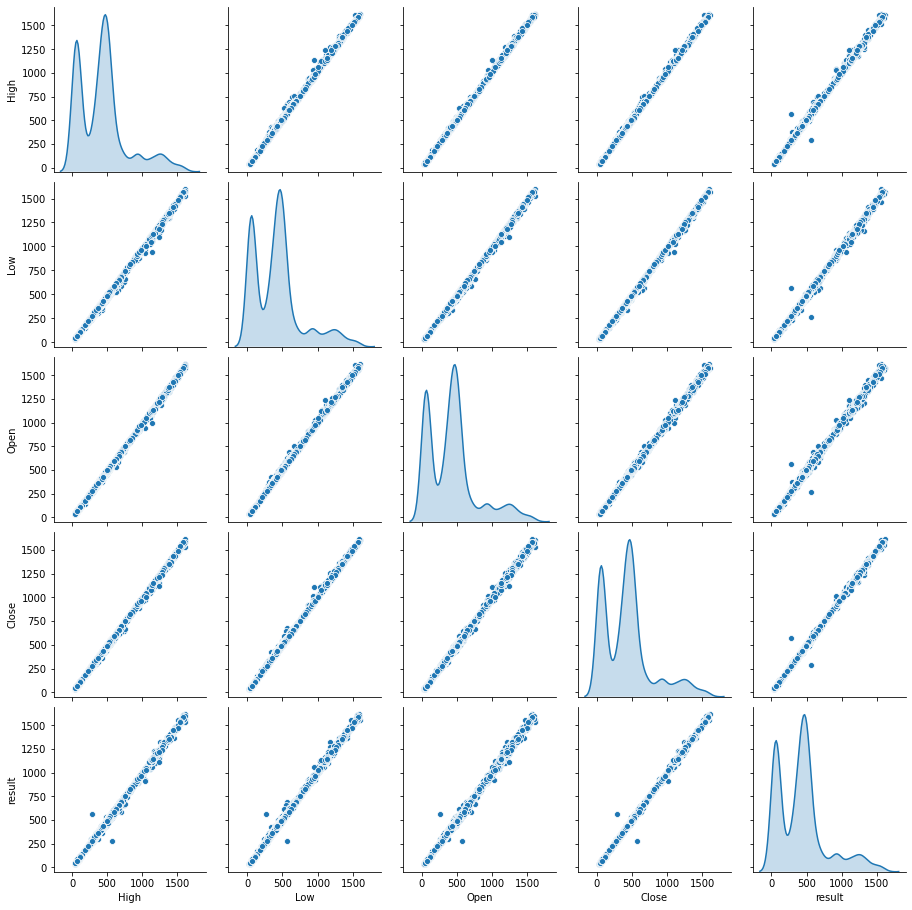

In [75]:
sns.pairplot(train_dataset[["High", "Low", "Open", "Close", "result"]], diag_kind="kde")

In [76]:
train_stats = train_dataset.describe()
train_stats.pop("result")
train_stats=train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
Open,3942.0,4.374820e+02,3.495736e+02,33.573601,8.856325e+01,4.292875e+02,5.295000e+02,1.615000e+03
High,3942.0,4.430056e+02,3.534058e+02,35.080898,9.011150e+01,4.347250e+02,5.344000e+02,1.617550e+03
Low,3942.0,4.313820e+02,3.451917e+02,31.800800,8.734497e+01,4.236875e+02,5.235437e+02,1.596100e+03
Close,3942.0,4.370325e+02,3.492294e+02,32.269402,8.852030e+01,4.287625e+02,5.280250e+02,1.609950e+03
Adj Close,3942.0,3.980496e+02,3.538301e+02,15.776643,5.880175e+01,3.834281e+02,4.760177e+02,1.609950e+03
...,...,...,...,...,...,...,...,...
H10,3942.0,4.400841e+02,3.509495e+02,35.432301,8.967415e+01,4.328815e+02,5.343875e+02,1.614450e+03
L10,3942.0,4.285530e+02,3.429424e+02,31.800800,8.671235e+01,4.222250e+02,5.227188e+02,1.577000e+03
C10,3942.0,4.341515e+02,3.468904e+02,32.269402,8.820398e+01,4.274685e+02,5.279688e+02,1.586500e+03
AC10,3942.0,3.951191e+02,3.512499e+02,15.776643,5.861728e+01,3.810996e+02,4.756018e+02,1.586500e+03


In [0]:
train_labels = train_dataset.pop('result')
test_labels = test_dataset.pop('result')

In [78]:
train_dataset

,Open,High,Low,Close,Adj Close,Volume,O1,H1,L1,C1,AC1,V1,O2,H2,L2,C2,AC2,V2,O3,H3,L3,C3,AC3,V3,O4,H4,L4,C4,AC4,V4,O5,H5,L5,C5,AC5,V5,O6,H6,L6,C6,AC6,V6,O7,H7,L7,C7,AC7,V7,O8,H8,L8,C8,AC8,V8,O9,H9,L9,C9,AC9,V9,O10,H10,L10,C10,AC10,V10
217,65.679100,66.381897,62.867599,63.828201,28.838354,60437404.0,68.724800,70.442902,64.843399,65.460403,29.575811,85895595.0,64.976196,69.662003,64.976196,68.443703,30.923698,102036929.0,62.789501,65.600998,62.578602,64.679398,29.222937,70742841.0,63.648602,63.921902,62.055401,62.805099,28.376108,35921267.0,64.070297,64.491997,62.984699,63.453300,28.668970,39832830.0,64.827797,65.694702,63.976601,64.242104,29.025358,49474229.0,64.507599,65.444801,63.820400,64.765297,29.261751,49856916.0,66.077400,66.358498,64.367104,64.679398,29.222937,50514968.0,66.225700,66.624001,65.757202,66.038300,29.836905,45814437.0,66.069504,66.702103,65.366699,66.436600,30.016865,40755312.0
2836,433.850006,438.000000,432.500000,436.600006,381.405396,4665952.0,431.649994,438.950012,429.674988,433.774994,378.937500,6086042.0,426.524994,434.850006,425.549988,432.725006,378.020233,7785438.0,423.750000,428.700012,422.850006,423.875000,370.289032,5973514.0,427.000000,429.975006,423.500000,426.649994,372.713257,4388252.0,436.500000,437.000000,426.000000,427.424988,373.390228,9571938.0,429.000000,437.450012,427.625000,435.350006,380.313385,9206408.0,424.424988,429.250000,420.350006,426.450012,372.538574,12287676.0,434.649994,434.649994,422.000000,422.975006,369.502838,15454860.0,437.200012,439.700012,432.500000,434.200012,379.308746,7543022.0,453.500000,453.500000,428.350006,430.975006,376.491486,13110568.0
1151,80.923500,83.563103,80.009804,83.289803,57.020008,43423476.0,80.283096,81.181198,80.283096,80.892303,55.378677,38877267.0,77.659103,80.673599,77.127998,80.329903,54.993671,52426669.0,77.299797,78.369698,77.159203,77.518501,53.069000,31201023.0,77.471603,77.682503,76.800003,77.377899,52.972736,22638112.0,78.096397,79.150703,77.323196,77.916801,53.341675,36752368.0,78.252602,78.689903,77.783997,78.104202,53.469944,31676308.0,79.033501,79.111603,78.119797,78.635300,53.833553,36866784.0,78.252602,79.502098,77.721497,79.267799,54.266556,32359847.0,79.970703,79.970703,78.104202,78.416603,53.683815,28978981.0,77.401299,79.658302,77.338898,79.525597,54.443043,53114185.0
3028,368.549988,374.500000,366.799988,372.524994,325.430695,6939968.0,367.049988,371.450012,364.024994,368.149994,321.608795,6211262.0,369.500000,370.250000,361.850006,367.549988,321.084595,7618632.0,362.924988,372.875000,362.100006,368.149994,321.608795,10106398.0,370.024994,370.500000,364.000000,365.424988,319.228271,6821954.0,376.950012,376.950012,369.250000,370.825012,323.945618,8411492.0,375.000000,378.399994,371.350006,374.299988,326.981232,6856690.0,377.399994,377.399994,370.174988,373.200012,326.020325,6351854.0,373.549988,376.725006,368.000000,374.049988,326.762878,4808492.0,373.024994,381.000000,368.750000,375.774994,328.269775,6498448.0,366.649994,372.799988,366.649994,371.649994,324.666290,5385010.0
432,47.482601,48.240101,46.639198,47.826199,23.382425,7429408.0,46.857800,47.623199,45.171001,47.154598,23.054081,13561029.0,47.638802,47.865299,46.576698,47.209301,23.080822,16364481.0,48.404099,48.888302,47.388901,47.919899,23.428238,4261266.0,47.794998,48.794601,47.638802,48.529099,23.726074,6340837.0,47.638802,48.654099,47.638802,48.474400,23.699337,6449292.0,48.185501,48.732201,47.263901,48.466599,23.695520,11274656.0,49.028900,49.028900,47.951199,48.216702,23.573345,16319191.0,48.419800,49.130402,47.263901,48.286999,23.607712,9897070.0,48.576000,48.732201,47.677799,48.466599,23.695520,8569883.0,48.849300,49.825500,46.178398,48.576000,23.749006,26367727.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3867,431.000000,435.000000,427.79

In [0]:
def norm(x):
  return (x - train_stats['mean']) / train_stats['std']
normed_train_data = norm(train_dataset)
normed_test_data = norm(test_dataset)

In [0]:
def build_model():
  model = keras.Sequential([
    layers.Dense(150, activation='relu', input_shape=[len(train_dataset.keys())]),
    layers.Dense(150, activation='relu'),
    layers.Dense(1)
  ])

  optimizer = tf.keras.optimizers.RMSprop(0.001)

  model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse'])
  return model

In [0]:
model = build_model()

In [82]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 150)               10050     
_________________________________________________________________
dense_4 (Dense)              (None, 150)               22650     
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 151       
Total params: 32,851
Trainable params: 32,851
Non-trainable params: 0
_________________________________________________________________


In [83]:
example_batch = normed_train_data[:10]
example_result = model.predict(example_batch)
example_result

array([[-0.02874541],
       [-0.10796876],
       [ 0.33261254],
       [-0.06540597],
       [ 0.2395919 ],
       [-0.15090866],
       [-0.8883758 ],
       [-0.17879865],
       [ 0.19120911],
       [ 0.12971729]], dtype=float32)

In [85]:
EPOCHS = 2000

history = model.fit(
  normed_train_data, train_labels,
  epochs=EPOCHS, validation_split = 0.2, verbose=0,
  callbacks=[tfdocs.modeling.EpochDots()])


Epoch: 0, loss:79.5027,  mae:5.0859,  mse:79.7027,  val_loss:108.3291,  val_mae:6.1882,  val_mse:108.7414,  
....................................................................................................
Epoch: 100, loss:79.5731,  mae:4.9755,  mse:79.7355,  val_loss:183.1499,  val_mae:8.7484,  val_mse:183.7318,  
....................................................................................................
Epoch: 200, loss:67.6410,  mae:4.8117,  mse:67.8183,  val_loss:137.8876,  val_mae:7.2338,  val_mse:138.8336,  
....................................................................................................
Epoch: 300, loss:70.6121,  mae:5.0171,  mse:70.3634,  val_loss:106.2602,  val_mae:6.1210,  val_mse:107.1903,  
....................................................................................................
Epoch: 400, loss:65.9507,  mae:4.6411,  mse:65.7311,  val_loss:222.9376,  val_mae:9.8441,  val_mse:223.7083,  
..........................................

In [86]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,mae,mse,val_loss,val_mae,val_mse,epoch
1995,39.473202,3.620553,39.581528,147.740219,5.859057,149.162888,1995
1996,37.115185,3.717891,37.155937,164.631134,6.253312,166.065460,1996
1997,32.734715,3.533832,32.748249,182.368774,8.157404,183.838348,1997
1998,38.318260,3.683179,38.456558,156.303864,6.726027,157.721985,1998
1999,34.508541,3.612030,34.643513,136.831863,5.567562,138.160858,1999


In [0]:
plotter = tfdocs.plots.HistoryPlotter(smoothing_std=2)

Text(0, 0.5, 'Loss [Open]')

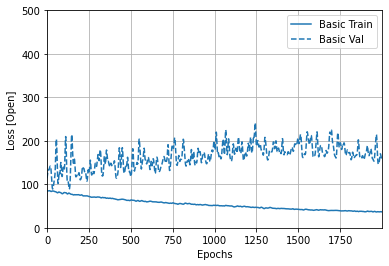

In [90]:
plotter.plot({'Basic': history}, metric = "loss")
plt.ylim([0, 500])
plt.ylabel('Loss [Open]')

Text(0, 0.5, 'MSE [High^2]')

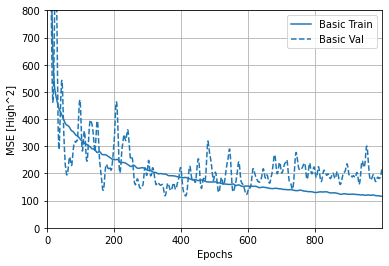

In [60]:
plotter.plot({'Basic': history}, metric = "mse")
plt.ylim([0, 800])
plt.ylabel('MSE [High^2]')

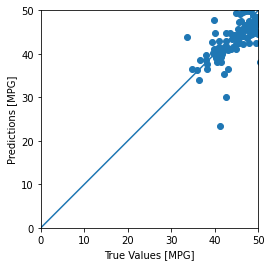

In [91]:
test_predictions = model.predict(normed_test_data).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [MPG]')
plt.ylabel('Predictions [MPG]')
lims = [0, 50]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

In [3]:
plt.plot(test_dataset.index,test_predictions)
plt.plot(test_dataset.index,test_labels)
new=test_dataset.index+1
lims = [500, 650]
plt.ylim(lims)

NameError: ignored

In [116]:
test_dataset.index

Int64Index([  10,   17,   31,   34,   35,   38,   42,   72,   74,   85,
            ...
            4968, 4969, 4971, 4974, 4977, 4978, 4985, 4986, 4991, 4996],
           dtype='int64', length=985)